<a href="https://colab.research.google.com/github/KevinW824/CSE-144-Applied-Machine-Learning/blob/main/Summer_21_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np

# Assignment 3

**DUE: Sunday July 11 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [3]:
NAME = "Bowen Wang"
STUDENT_ID = "bwang93"

## Problem 1 - Logistic Regression Calculation

Recall from lecture sigmoid function:
$$\begin{align}
f(x)= \sigma(\theta^T \cdot \mathbf{x})) = \frac{1}{1+e^{-\theta^T \cdot \mathbf{x}}}
\end{align}$$



### a) Probabilities (10 points)
Write a script to, or by hand, calculate the probability $ \sigma(\theta^T \cdot \mathbf{x}))$ for each of the following $x^i$'s assuming Assuming $\theta=[-0.1, 0.1, 0.5, 0.3]$, 

| | $x^i_{0}$ | $x^i_{1}$ | $x^i_{2}$ | y|
| --- | --- | --- | --- | --- |
|$x^{1}$ | 1 | -7 | -3 | 0 |
|$x^{2}$ | 1 | 5 | 1 | 1 |
|$x^{3}$ | 1 | 1 | 1 | 1 |
|$x^{4}$ | -1 | -1 | 1 | 1 |
|$x^{5}$ | 2 | -1 | 3 | 0 |


[YOUR ANSWER HERE]

### b) Classification (10 points)

Using the probabilities you calculated in part a) and the decision boundary $\theta^T\mathbf{x}=0$ classify the points as class 1 or class 0.

[YOUR ANSWER HERE]

## Problem 2 - Logistic Regression

For this problem, we will predict whether or not breast tumors are cancerous or not using the Breast Cancer Wisconsin (Diagnostic) Data Set. Begin by importing and processing data. A description of the dataset is given below.


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3 to 32)

Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [5]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
downloaded = drive.CreateFile({'id':"1igyRhO_Vugc0WD_bop9WUqX61Q4BJYBg"})
downloaded.GetContentFile('data.csv')  

In [8]:
# Create pandas dataframe
data = pd.read_csv('data.csv')

In [9]:
# Let's look at the data
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [10]:
# drop Unnamed: 32 column
data = data.iloc[:,0:-1]

#drop the id column
data = data.iloc[:,1:]

In [11]:
# Let's check the data again
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### a) Converting Categorical Data to Numeric Values (5 points)

The diagnosis column has categorical values 'B' if a tumor is benign, and 'M' if it is malignant. Convert these values to 0 for 'B' and 1 for 'M'.

In [12]:
### YOUR CODE HERE ###
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### b) Run Logistic Regression (10 points)
Divide your data into feature set X which contains the following variables:
* radius_mean	
* texture_mean	
* perimeter_mean	area_mean	
* smoothness_mean	
* compactness_mean
* concavity_mean	
* concave points_mean	
* symmetry_mean	
* fractal_dimension_mean	radius_se	
* texture_se	perimeter_se	
* area_se	
* smoothness_se	
* compactness_se	
* concavity_se	
* concave points_se	
* symmetry_se	
* fractal_dimension_se	
* radius_worst	
* texture_worst	
* perimeter_worst	
* area_worst	smoothness_worst	
* compactness_worst	
* concavity_worst	
* concave points_worst	
* symmetry_worst	
* fractal_dimension_worst

and labels y which contains the diagnosis column. Then divide your data into 75% training set data and 25% test set data

In [24]:
# Split data into X and y
X = data.drop(columns=['diagnosis'])### YOUR CODE HERE ###
y = data.iloc[:, 0]### YOUR CODE HERE ###

# Split X and y into X_train, y_train, X_test, y_test using train_test_split()
### YOUR CODE HERE ###
X = X.values
y = y.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
# instantiate LinearRegression
clf = LogisticRegression(random_state=0)### YOUR CODE HERE ### 


# Fit the regressor using X_train and y_train
### YOUR CODE HERE ###
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### c) Classification accuracy for the training and test sets (5 points)

In [38]:
# Generate predictions using X_train
### YOUR CODE HERE ###
from sklearn.metrics import accuracy_score
train_pred = clf.predict(X_train)

# Calculate the classification accuracy for the training set
### YOUR CODE HERE ###
train_score = accuracy_score(y_train, train_pred)
print("train_score:", train_score)

# Generate predictions using X_test
### YOUR CODE HERE ###
test_pred = clf.predict(X_test)

# Calculate the classification accuracy for the test set
### YOUR CODE HERE ###
test_score = accuracy_score(y_test, test_pred)
print("test_score:", test_score)

train_score: 0.9483568075117371
test_score: 0.9440559440559441


### d) False Positives, False Negatives, True Positives, True Negatives (5 points)

In binary classification, A **false positive** (FP) is an outcome where the model incorrectly predicts the positive class. And a **false negative** (FN) is an outcome where the model incorrectly predicts the negative class. Likewise, a **true positive** (TP) is an outcome where the model correctly predicts a positive class. A **true negative** (TN) is an outcome where the model correctly predicts the negative class.

Calculate the number of FPs, FNs, TPs,and TNs using the test set predictions and test set labels.

In [46]:
# Calculate the number of false positives using the test set predictions and test set labels.
### YOUR CODE HERE ###
fp = 0
for i in range(len(test_pred)):
    if test_pred[i] == 1 and y_test[i] == 0:
        fp += 1
print("false positive:", fp)

# Calculate the number of false negatives using the test set predictions and test set labels.
### YOUR CODE HERE ###
fn = 0
for i in range(len(test_pred)):
    if y_test[i] == 1 and test_pred[i] == 0:
        fn += 1
print("false negative:", fn)

#Calculate the number of true positives using the test set predictions and test set labels.
### YOUR CODE HERE ###
tp = 0
for i in range(len(test_pred)):
    if y_test[i] == test_pred[i] == 1:
        tp += 1
print("true positive:", tp)

#Calculate the number of true negatives using the test set predictions and test set labels.
### YOUR CODE HERE ###
tn = 0
for i in range(len(test_pred)):
    if y_test[i] == test_pred[i] == 0:
        tn += 1
print("true negative:", tn)

false positive: 6
false negative: 2
true positive: 51
true negative: 84


### e) Precision and Recall (5 points)

Two important statistics used to analyze the performance of classification models are precision and recall. **precision** (also called positive predictive value) is proportion of positive identifications that were actually correct, while **recall** (also known as sensitivity) is the proportion of actual positives that were identified correctly.

Precision can be calculated as:
$$Precision = \frac{TP}{TP+FP}$$

Recall can be calculated as:
$$Recall = \frac{TP}{TP+FN}$$

For more info: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall


Use your answer from part d) to calculate Precision:

$$ Precision = \dfrac{51}{51 + 6} = 0.8947 $$

User your answer from part d) to calculate Recall:

$$ Recall = \dfrac{51}{51 + 2} = 0.9623 $$

## Problem 3 - Neural Network For Classification


### a) Training a simply neural network for classification (5 points)
Complete the following code segments to create a NN.

In [47]:
# import Keras from TensorFlow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


data.shape = (500, 2)
labels.shape = (500,)


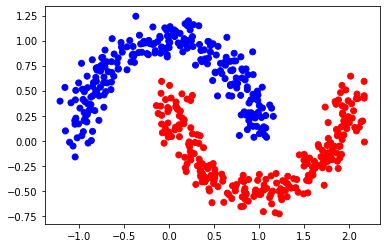

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons
from pylab import rcParams

# Create the training data
np.random.seed(42) 
data, labels = make_moons(n_samples=500, noise=0.1)
colors = ['r' if y else 'b' for y in labels]
print('data.shape =', data.shape)
print('labels.shape =', labels.shape)
plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

test_data.shape = (500, 2)
test_labels.shape = (500,)


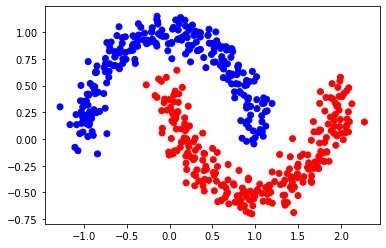

In [49]:
# Create and plot the test data
np.random.seed(17)   
test_data, test_labels = make_moons(n_samples=500, noise=0.1)
colors = ['r' if y else 'b' for y in test_labels]
print('test_data.shape =', test_data.shape)
print('test_labels.shape =', test_labels.shape)
plt.scatter(test_data[:,0], test_data[:,1], c=colors)
plt.show()

The above image is created by sampling from the same distribution as before. But these are entirely different points than your model was trained on.  So how our model performs on this test data will be a good indication of our model's ability to generalize.

 In the cell below, construct a simple neural network with 5 layers as follows:
* **input layer** of shape 5
* **dense layer** with 10 neurons, and relu activation
* **dense layer** with 4 neurons, and relu activation
* **dense layer** with 3 neurons, and relu activation
* **dense layer** with 1 neuron, and sigmoid activation

In [62]:
def build_model1():
    ### YOUR CODE HERE ###
    input_layer = Input(shape=(2))
    x = Dense(10, activation='relu')(input_layer)
    x = Dense(4, activation='relu')(x)
    x = Dense(3, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x) 
    return Model(input_layer, x)

In [63]:
# Get model summary
model = build_model1()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compile the NN model, defining the optimizer to use (sgd), the loss function (binary_crossentropy), and the metrics (acc) to use.
# These settings are appropriate for a binary classification task.

# Compile model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model (obviously on the training data), iterating on the data in batches of 32 samples for 300 epochs. Have a validation_split of 0.2.
history = model.fit(data,
                    labels, 
                    epochs=300, 
                    batch_size=32, 
                    validation_split=0.2)### YOUR CODE HERE ###

# Evaluate the model's performance
train_loss, train_acc = model.evaluate(data, labels)
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

Epoch 1/300
13/13 [==============================] - 1s 21ms/step - loss: 0.7154 - accuracy: 0.3875 - val_loss: 0.7019 - val_accuracy: 0.4400
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.7104 - accuracy: 0.3875 - val_loss: 0.7004 - val_accuracy: 0.4200
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.3800 - val_loss: 0.6998 - val_accuracy: 0.4200
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7065 - accuracy: 0.3800 - val_loss: 0.6994 - val_accuracy: 0.4000
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7054 - accuracy: 0.3625 - val_loss: 0.6990 - val_accuracy: 0.3900
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.3500 - val_loss: 0.6987 - val_accuracy: 0.3700
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 0.7036 - accuracy: 0.3400 - val_loss: 0.6983 - val_accuracy: 0.3600
Epoch 8/300


Let's next look at some training plots.

In [65]:
history

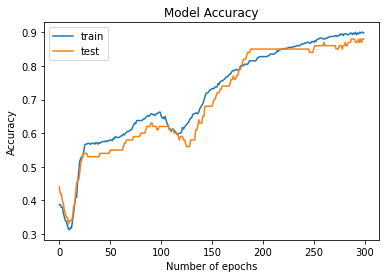

In [66]:
# The history of our accuracy during training.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

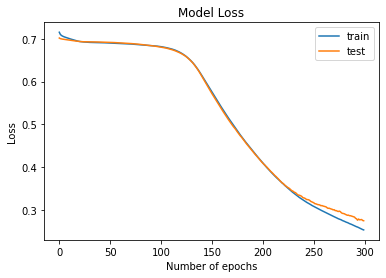

In [67]:
# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### b) Analyzing model performance (5 points)
What was your model's final prediction accuracy on the test set? Explain the pattern/trend you have observed in the previous two plots in your own words.


The final prediction accuracy is 0.9040.\
As the number of epochs increases, the training and test accuracy gradually increases and the loss decrease.\
The most significant change happens between epoch 100 - 200.

### c) Decision Boundary (5 points)
Plot the decisin boundary of the network you built (using the code below) and explain what you observe and why.

The following code will allow us to visualize our deep neural network's decision boundary. Let's observe.

This will take a moment to construct the plot.

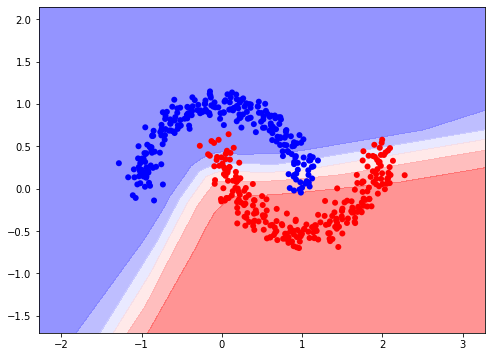

In [68]:
#
# This code is substantively from https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/
#
def plot_decision_boundary(X, y, model, steps=1000, cmap='bwr'):
    # The following allows you to adjust the plot size
    rcParams['figure.figsize'] = 8, 6  # 8 inches by 6 inches
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(test_data, test_labels, model) 
# Reset figure size back to default.
rcParams['figure.figsize'] = 6, 4

The decision boundary is not perfect, but mostly accuracy. There are some part of blue and red crosing.

## Problem 4 - Fish Data revisited 

We will revist the "Fish" dataset and train a regression neural network on the features "Length1", "Length2", "Length3",	"Height", and "Width" to predict Weight. Run or fill in the following cells and answer written response questions for each section. Begin by downloading "Fish.csv".

In [69]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [70]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [71]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"1AtMi-xCejVlhYS5qjgjjW4gH-TLuWJjC"})
downloaded.GetContentFile('Fish.csv')  

# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

# Delete any rows for which there is a measurement of 0.0.
fish_data = fish_data.drop( np.where(fish_data==0)[0] )
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [72]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### a) Data Preprocessing (15 points)

Recall from the previous lectures and class excercises that it is especially important to normalize data for neural networks.

In order to normalize our data to $[0,1]$ we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

Normalize the "Length1", "Length2", "Length3",	"Height", and "Width", and "Weight" columns. We often need to normalize the target variables in a neural network regression task to limit exploding gradients (why might exploding gradients be more prevalent in a regression task?).



In [73]:
# Get fish max and min weight, we'll need these later.
fish_max = fish_data["Weight"].max()
fish_min = fish_data["Weight"].min()

# Normalize the "Length1", "Length2", "Length3", "Height", "Width", "Weight" columns of fish_data.
### YOUR CODE HERE ###
for col in fish_data:
    if fish_data[col].dtype != object:
        fish_data[col] = (fish_data[col] - fish_data[col].min()) / (fish_data[col].max() - fish_data[col].min())

# Take a look at the new age column.
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,0.143604,0.304854,0.309091,0.358108,0.568334,0.418978
1,Bream,0.172800,0.320388,0.325455,0.378378,0.624055,0.459235
2,Bream,0.203211,0.318447,0.329091,0.376689,0.618123,0.514279
3,Bream,0.217201,0.365049,0.374545,0.417230,0.638566,0.480365
4,Bream,0.257953,0.368932,0.374545,0.425676,0.621966,0.576004


In [121]:
# split the data into features X_fish and target variable y_fish.
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
    Length1   Length2   Length3    Height     Width
0  0.304854  0.309091  0.358108  0.568334  0.418978
1  0.320388  0.325455  0.378378  0.624055  0.459235
2  0.318447  0.329091  0.376689  0.618123  0.514279
3  0.365049  0.374545  0.417230  0.638566  0.480365
4  0.368932  0.374545  0.425676  0.621966  0.576004

y_fish.head()
0    0.143604
1    0.172800
2    0.203211
3    0.217201
4    0.257953
Name: Weight, dtype: float64


In [122]:
# Split the X_fish and y_fish into 60/20 training/test split using train_test_split()
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X_fish, y_fish, test_size = 0.25, random_state = 0)

### b) Neural Network Training (20 points)

In the cell below, build a neural network 4 layers as follows:
* **input layer** of shape 5
* **dense layer** with 10 neurons, and sigmoid activation
* **dense layer** with 10 neurons, and sigmoid activation
* **dense layer** with 5 neurons, and sigmoid activation
* **dense layer** with 1 neuron, and linear activation

In [123]:
def build_model1():
### YOUR CODE HERE ###
    input_layer = Input(shape=(5))
    x = Dense(10, activation='sigmoid')(input_layer)
    x = Dense(10, activation='sigmoid')(x)
    x = Dense(5, activation='sigmoid')(x)
    x = Dense(1, activation='linear')(x) 
    return Model(input_layer, x)

In [124]:
# Get model summary
model = build_model1()
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 6         
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


Declare an SGD optimizer with learning rate of 0.05, weight decay of 1e-6 and momentum of 0.9. Compile your model Use mean_squared_error as the loss and metrics with the sgd optimizer.


In [125]:
# Declare the optimizer
### YOUR CODE HERE ###
sgd = SGD(learning_rate=0.05, decay=1e-6, momentum=0.9)

# Compile model
### YOUR CODE HERE ###
model.compile(optimizer=sgd ,loss='mean_squared_error',metrics=['mean_squared_error'])

Perform model fitting using the training set. Train for 2500 epochs with a batch size of 128 and a validation split of 0.25

In [126]:
# Fit model
history = model.fit(X_train,
                    y_train, 
                    epochs=2500, 
                    batch_size=128, 
                    validation_split=0.25)### YOUR CODE HERE ###


Streaming output truncated to the last 5000 lines.
Epoch 1/2500
1/1 [==============================] - 1s 583ms/step - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 2/2500
1/1 [==============================] - 0s 28ms/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 3/2500
1/1 [==============================] - 0s 30ms/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 4/2500
1/1 [==============================] - 0s 31ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 5/2500
1/1 [==============================] - 0s 29ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0643 - val_mean_squared_error: 0.0643
Epoch 6/2500
1/1 [==============================] - 0s 27ms/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0689 - val_mean_squa

In [127]:
# Get fish weight predictions
y_fish_pred = model.predict(X_test)

# map normalized fish weights back to grams
y_fish_pred = (fish_max-fish_min) * y_fish_pred + fish_min 
y_test = (fish_max-fish_min) * y_test.values + fish_min 

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print("mean squared error:", mean_squared_error(y_test, y_fish_pred))

# Compute the coefficient of determination using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print("coefficient of determination:", r2_score(y_test, y_fish_pred))

mean squared error: 14946.003630118134
coefficient of determination: 0.9041004367347083


In [131]:
# Print the predictions along with actual weights
np.set_printoptions(formatter={'float_kind':'{:f}'.format},precision=2)
print(np.concatenate((y_fish_pred.reshape(len(y_fish_pred),1), y_test.reshape(len(y_test),1)),1))

[[446.962341 390.000000]
 [196.177612 160.000000]
 [669.945557 700.000000]
 [859.217957 1015.000000]
 [111.104973 120.000000]
 [856.525085 1100.000000]
 [766.707886 820.000000]
 [952.274902 950.000000]
 [618.293518 556.000000]
 [171.661346 145.000000]
 [659.982056 700.000000]
 [1148.448120 1600.000000]
 [707.152100 720.000000]
 [17.954830 55.000000]
 [81.505287 85.000000]
 [239.275787 188.000000]
 [426.234375 300.000000]
 [212.143341 180.000000]
 [1148.448120 1550.000000]
 [352.750000 306.000000]
 [164.819077 140.000000]
 [918.986511 975.000000]
 [784.370483 1000.000000]
 [475.721710 450.000000]
 [140.109055 110.000000]
 [86.166931 78.000000]
 [362.336609 300.000000]
 [621.307129 650.000000]
 [-113.161606 6.700000]
 [547.550293 514.000000]
 [313.469177 290.000000]
 [285.722504 270.000000]
 [579.037842 700.000000]
 [434.899719 300.000000]
 [577.746765 510.000000]
 [612.692017 620.000000]
 [168.835663 150.000000]
 [169.567612 170.000000]
 [691.597229 700.000000]
 [191.449173 170.000000]]

What was the R-squared value and mean squared error for this model? Does this model appear to do a better job at predicting weights than linear regression?

[YOUR ANSWER HERE]